In [1]:
# pip install yfinance

# Source: https://pypi.org/project/yfinance/

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
#Download all stocks. 'final_code'

sdate= "2021-01-01"
edate = "2022-05-23"

FB = yf.download("FB", start=sdate, end=edate, interval='1h')
AAPL = yf.download("AAPL", start=sdate, end=edate, interval='1h')
AMZN = yf.download("AMZN", start=sdate, end=edate, interval='1h')
NFLX = yf.download("NFLX", start=sdate, end=edate, interval='1h')
GOOG = yf.download("GOOG", start=sdate, end=edate, interval='1h')
VIX = yf.download("^VIX", start=sdate, end=edate, interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Subroutine to create date and time. 'final_code'
def clean_df(df):
    df = df.reset_index()
    df['date'] = df['index']
    df['Dates'] = pd.to_datetime(df['date']).dt.date
    df['Time'] = pd.to_datetime(df['date']).dt.time
    df = df.drop(['index'], axis=1)
    df['y']=(df['Adj Close'] > df['Adj Close'].shift()).astype(int)
    return df


# Source: yash
# Source: https://stackoverflow.com/questions/63840851/compare-current-row-value-to-previous-row-values

In [5]:
# Mapping the function to all dataframes. 'final_code'
FB = clean_df(FB)
AAPL = clean_df(AAPL)
AMZN = clean_df(AMZN)
NFLX = clean_df(NFLX)
GOOG = clean_df(GOOG)
VIX = clean_df(VIX)

In [6]:
#Checking the dataframe.
FB

,Open,High,Low,Close,Adj Close,Volume,date,Dates,Time,y
0,273.750000,273.899994,269.980011,271.170013,271.170013,2708653,2021-01-04 09:30:00-05:00,2021-01-04,09:30:00,0
1,271.269989,272.637787,267.459991,268.320007,268.320007,2139367,2021-01-04 10:30:00-05:00,2021-01-04,10:30:00,0
2,268.220001,269.049988,265.200012,266.940002,266.940002,1908151,2021-01-04 11:30:00-05:00,2021-01-04,11:30:00,0
3,266.920013,269.040009,265.899994,268.446899,268.446899,1320871,2021-01-04 12:30:00-05:00,2021-01-04,12:30:00,1
4,268.440002,269.779907,268.070007,269.279999,269.279999,1708964,2021-01-04 13:30:00-05:00,2021-01-04,13:30:00,1
...,...,...,...,...,...,...,...,...,...,...
2436,192.020004,192.574997,187.869995,188.259903,188.259903,4707266,2022-05-20 12:30:00-04:00,2022-05-20,12:30:00,0
2437,188.250000,191.300003,188.089996,190.259995,190.259995,3642063,2022-05-20 13:30:00-04:00,2022-05-20,13:30:00,1
2438,190.199402,191.798401,189.389999,191.798401,191.798401,2774321,2022-05-20 14:30:00-04:00,2022-05-20,14:30:00,1
2439,191.789993,193.740005,191.270004,193.539993,193.539993,3964176,2022-05-20 15:30:00-04:00,2022-05-20,15:30:00,1


In [7]:
VIX

,Open,High,Low,Close,Adj Close,Volume,date,Dates,Time,y
0,23.309999,24.930000,23.309999,24.830000,24.830000,0,2021-01-04 09:30:00-05:00,2021-01-04,09:30:00,0
1,24.790001,27.379999,24.750000,26.469999,26.469999,0,2021-01-04 10:30:00-05:00,2021-01-04,10:30:00,1
2,26.450001,29.190001,26.450001,27.850000,27.850000,0,2021-01-04 11:30:00-05:00,2021-01-04,11:30:00,1
3,27.860001,28.830000,26.709999,26.910000,26.910000,0,2021-01-04 12:30:00-05:00,2021-01-04,12:30:00,0
4,26.889999,27.600000,26.700001,27.250000,27.250000,0,2021-01-04 13:30:00-05:00,2021-01-04,13:30:00,1
...,...,...,...,...,...,...,...,...,...,...
2436,30.740000,32.910000,30.650000,32.900002,32.900002,0,2022-05-20 12:30:00-04:00,2022-05-20,12:30:00,1
2437,32.900002,32.900002,31.379999,32.119999,32.119999,0,2022-05-20 13:30:00-04:00,2022-05-20,13:30:00,0
2438,32.090000,32.490002,29.860001,29.860001,29.860001,0,2022-05-20 14:30:00-04:00,2022-05-20,14:30:00,0
2439,29.870001,30.170000,29.370001,29.530001,29.530001,0,2022-05-20 15:30:00-04:00,2022-05-20,15:30:00,0


In [8]:
# combine stock price and associated Labels
faang = pd.DataFrame()  

faang['Dates'] = FB['Dates']
faang['Time'] = FB['Time']
faang['FB_Adj_Close'] = FB['Adj Close']
faang['FB_y'] = FB['y']
faang['AAPL_Adj_Close'] = AAPL['Adj Close']
faang['AAPL_y'] = AAPL['y']
faang['AMZN_Adj_Close'] = AMZN['Adj Close']
faang['AMZN_y'] = AMZN['y']
faang['NFLX_Adj_Close'] = NFLX['Adj Close']
faang['NFLX_y'] = NFLX['y']
faang['GOOG_Adj_Close'] = GOOG['Adj Close']
faang['GOOG_y'] = GOOG['y']
faang['VIX'] = VIX['Adj Close']

# Varify no missing data:
print('Number of NaN values present:')
print(faang.isnull().sum())

# Source: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ 

Number of NaN values present:
Dates             0
Time              0
FB_Adj_Close      0
FB_y              0
AAPL_Adj_Close    0
AAPL_y            0
AMZN_Adj_Close    0
AMZN_y            0
NFLX_Adj_Close    0
NFLX_y            0
GOOG_Adj_Close    0
GOOG_y            0
VIX               0
dtype: int64


In [9]:
# Varify zero value data:

print('Number of 0 values present:')
print('Dates:', (faang['Dates'] == 0).sum())
print('Time:', (faang['Time'] == 0).sum())
print('FB_Adj_Close:', (faang['FB_Adj_Close'] == 0).sum())
print('AAPL_Adj_Close:', (faang['AAPL_Adj_Close'] == 0).sum())
print('AMZN_Adj_Close:', (faang['AMZN_Adj_Close'] == 0).sum())
print('NFLX_Adj_Close:', (faang['NFLX_Adj_Close'] == 0).sum())
print('GOOG_Adj_Close:', (faang['GOOG_Adj_Close'] == 0).sum())
print('VIX:', (faang['VIX'] == 0).sum())

Number of 0 values present:
Dates: 0
Time: 0
FB_Adj_Close: 0
AAPL_Adj_Close: 0
AMZN_Adj_Close: 0
NFLX_Adj_Close: 0
GOOG_Adj_Close: 0
VIX: 0


In [10]:
# Explore data:

faang.describe()

,FB_Adj_Close,FB_y,AAPL_Adj_Close,AAPL_y,AMZN_Adj_Close,AMZN_y,NFLX_Adj_Close,NFLX_y,GOOG_Adj_Close,GOOG_y,VIX
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,296.899201,0.498156,147.682053,0.498156,3234.559501,0.478492,501.709258,0.485047,2542.405501,0.511676,21.425903
std,55.323391,0.500099,17.187539,0.500099,288.616339,0.499640,117.429845,0.499879,331.211309,0.499966,4.887187
min,171.949997,0.000000,116.400002,0.000000,2104.810059,0.000000,166.410004,0.000000,1716.534424,0.000000,14.550000
25%,261.070007,0.000000,132.615005,0.000000,3128.000000,0.000000,486.690002,0.000000,2305.526611,0.000000,17.530001
50%,315.269989,0.000000,147.080002,0.000000,3291.939941,0.000000,520.112976,0.000000,2625.500000,1.000000,20.170000
75%,339.239990,1.000000,162.330002,1.000000,3404.000000,1.000000,575.594971,1.000000,2818.340088,1.000000,23.670000
max,383.600006,1.000000,182.250000,1.000000,3766.290039,1.000000,693.096680,1.000000,3027.239990,1.000000,37.980000


In [11]:
faang.head(5)

,Dates,Time,FB_Adj_Close,FB_y,AAPL_Adj_Close,AAPL_y,AMZN_Adj_Close,AMZN_y,NFLX_Adj_Close,NFLX_y,GOOG_Adj_Close,GOOG_y,VIX
0,2021-01-04,09:30:00,271.170013,0,131.053604,0,3235.080078,0,528.523499,0,1748.239990,0,24.830000
1,2021-01-04,10:30:00,268.320007,0,129.895004,0,3195.239990,0,522.750000,0,1730.589966,0,26.469999
2,2021-01-04,11:30:00,266.940002,0,128.250000,0,3160.614990,0,517.260010,0,1716.534424,0,27.850000
3,2021-01-04,12:30:00,268.446899,1,129.039795,1,3180.530029,1,519.162720,1,1722.277466,1,26.910000
4,2021-01-04,13:30:00,269.279999,1,128.960007,0,3180.500000,0,521.549988,1,1724.395020,1,27.250000


In [12]:
# Extract file into csv for model analysis in excel

# FB.to_csv ("FB.csv")
# AAPL.to_csv ("AAPL.csv")
# AMZN.to_csv ("AMZN.csv")
# NFLX.to_csv ("NFLX.csv")
# GOOG.to_csv ("GOOG.csv")
# VIX.to_csv ("VIX.csv")

faang.to_csv ("faang.csv")

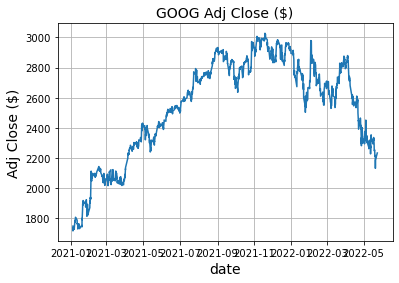

In [13]:
# Graphical representation of the price history for one stock

plt.plot(GOOG['date'], GOOG['Adj Close'])
plt.xlabel("date", fontsize=14)
plt.ylabel("Adj Close ($)", fontsize=14)
plt.title("GOOG Adj Close ($)", fontsize=14) 
plt.grid(True)
plt.show()

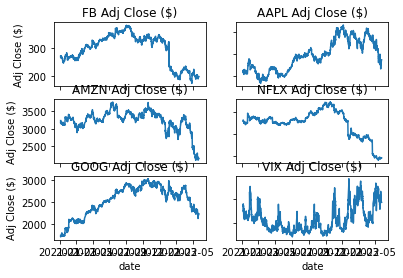

In [14]:
# Graphical representation of the price history

fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(FB['date'], FB['Adj Close'])
axs[0, 0].set_title('FB Adj Close ($)')
axs[0, 1].plot(AAPL['date'], AAPL['Adj Close'])
axs[0, 1].set_title('AAPL Adj Close ($)')
axs[1, 0].plot(AMZN['date'], AMZN['Adj Close'])
axs[1, 0].set_title('AMZN Adj Close ($)')
axs[1, 1].plot(NFLX['date'], NFLX['Adj Close'])
axs[1, 1].set_title('NFLX Adj Close ($)')
axs[2, 0].plot(GOOG['date'], GOOG['Adj Close'])
axs[2, 0].set_title('GOOG Adj Close ($)')
axs[2, 1].plot(VIX['date'], VIX['Adj Close'])
axs[2, 1].set_title('VIX Adj Close ($)')

for ax in axs.flat:
    ax.set(xlabel='date', ylabel='Adj Close ($)')

for ax in fig.get_axes():
    ax.label_outer()

# Source: https://matplotlib.org/3.5.0/gallery/subplots_axes_and_figures/subplots_demo.html

In [15]:
FB_f = yf.Ticker("FB")

# show institutional holders
FB_f.get_institutional_holders()

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",180453366,2022-03-30,0.0787,40125610463
1,Blackrock Inc.,149971299,2022-03-30,0.0654,33347618045
2,"FMR, LLC",122726307,2022-03-30,0.0535,27289421624
3,State Street Corporation,92712376,2022-03-30,0.0404,20615523927
4,Price (T.Rowe) Associates Inc,74661117,2022-03-30,0.0326,16601645976
5,Capital International Investors,54050797,2022-03-30,0.0236,12018735220
6,"Geode Capital Management, LLC",41449631,2022-03-30,0.0181,9216739949
7,Capital World Investors,41239684,2022-03-30,0.0180,9170056134
8,Capital Research Global Investors,29909545,2022-03-30,0.0130,6650686426
9,Norges Bank Investment Management,28527168,2021-12-30,0.0124,9595112956


In [16]:
# show financials

FB_f.quarterly_financials

,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Research Development,7707000000.0,7046000000.0,6316000000.0,6096000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,8908000000.0,12703000000.0,10565000000.0,12513000000.0
Minority Interest,None,None,None,None
Net Income,7465000000.0,10285000000.0,9194000000.0,10394000000.0
Selling General Administrative,5672000000.0,7692000000.0,6500000000.0,5215000000.0
Gross Profit,21903000000.0,27323000000.0,23239000000.0,23678000000.0
Ebit,8524000000.0,12585000000.0,10423000000.0,12367000000.0
Operating Income,8524000000.0,12585000000.0,10423000000.0,12367000000.0
Other Operating Expenses,None,None,None,None


In [17]:
# show balance sheet

FB_f.quarterly_balance_sheet

,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Intangible Assets,9.100000e+08,6.340000e+08,3.650000e+08,5.140000e+08
Capital Surplus,5.751200e+10,5.581100e+10,5.433400e+10,5.284500e+10
Total Liab,4.099000e+10,4.110800e+10,3.622500e+10,3.238200e+10
Total Stockholder Equity,1.232280e+11,1.248790e+11,1.333600e+11,1.382270e+11
Other Current Liab,1.455000e+09,1.269800e+10,1.373000e+09,1.340000e+09
Total Assets,1.642180e+11,1.659870e+11,1.695850e+11,1.706090e+11
Other Current Assets,2.940000e+08,1.490000e+08,1.950000e+08,2.010000e+08
Retained Earnings,6.771200e+10,6.976100e+10,7.923300e+10,8.509700e+10
Other Liab,6.486000e+09,6.721000e+09,6.352000e+09,6.059000e+09
Good Will,1.992300e+10,1.919700e+10,1.906500e+10,1.921900e+10


In [18]:
# show analysts recommendations

FB_f.recommendations.tail(20)

,Firm,To Grade,From Grade,Action
Date,,,,
2022-03-11 10:10:54,Deutsche Bank,Buy,,init
2022-04-05 13:09:08,UBS,Buy,,main
2022-04-13 10:45:39,RBC Capital,Outperform,,main
2022-04-19 12:40:55,Rosenblatt,Neutral,,init
2022-04-19 13:12:10,JMP Securities,Market Outperform,,main
2022-04-20 09:05:05,Citigroup,Buy,Neutral,up
2022-04-21 11:12:48,Credit Suisse,Outperform,,main
2022-04-25 11:42:46,Mizuho,Buy,,main
2022-04-28 10:16:36,Piper Sandler,Neutral,,main


In [19]:
# fetch other financial data for all 5 stocks:  

FB_f = yf.Ticker("FB")
FB_qf = FB_f.quarterly_financials
FB_qb = FB_f.quarterly_balance_sheet
FB_ih = FB_f.get_institutional_holders()
FB_sr = FB_f.recommendations

AAPL_f = yf.Ticker("AAPL")
AAPL_qf = AAPL_f.quarterly_financials
AAPL_qb = AAPL_f.quarterly_balance_sheet
AAPL_ih = AAPL_f.get_institutional_holders()
AAPL_sr = AAPL_f.recommendations

AMZN_f = yf.Ticker("AMZN")
AMZN_qf = AMZN_f.quarterly_financials
AMZN_qb = AMZN_f.quarterly_balance_sheet
AMZN_ih = AMZN_f.get_institutional_holders()
AMZN_sr = AMZN_f.recommendations

NFLX_f = yf.Ticker("NFLX")
NFLX_qf = NFLX_f.quarterly_financials
NFLX_qb = NFLX_f.quarterly_balance_sheet
NFLX_ih = NFLX_f.get_institutional_holders()
NFLX_sr = NFLX_f.recommendations

GOOG_f = yf.Ticker("GOOG")
GOOG_qf = GOOG_f.quarterly_financials
GOOG_qb = GOOG_f.quarterly_balance_sheet
GOOG_ih = GOOG_f.get_institutional_holders()
GOOG_sr = GOOG_f.recommendations